Задачи занятия: 
                1. Загрузить и визуализировать график силы деформирования полученный при испытаниях плоского образца на растяжение;
                2. Пересчитать график силы деформирования в график инженерных и истинных напряжений и деформаций;
                3. Визуализировать график инженерных напряжений и деформаций;
                4. Визуализировать график истинных напряжений и деформаций;
                5. Определить предел прочности материала;
                6. Определить равномерное удлинение материала.
Данные перемещение-сила стали 08кп толщиной 1.5 мм хранятся следующей локации: '../data/load_stroke_data.txt'.


In [1]:
# импортируем библиотеку для визаулизации данных
import matplotlib.pyplot as plt

для чтения данных из файла нам понадобятся две переменные типа list: 
stroke - для хранения данных о перемещении, load - для хранения данных о силе

In [2]:
stroke = [] # пустой список для записи данных о перемещении
load = [] # пустой список для записи данных о силе
# Проверим содержание этих двух переменных
stroke, load

([], [])

In [3]:
# открываем файл с данными
with open ('../data/load_stroke_data.txt', 'r') as file: # 'r' означает, что файл мы октрываем для чения
    for line in file:                                    # для каждой строки в файле мы выполняем следующие действия
        stroke_load = line.split()                   # разделяем строку по табуляции (можно было ничего не писать в скобках 
                                                         # и разделение было бы по любым пробелам). Получаем временный список из двух чисел
        stroke.append(float(stroke_load[0]))             # первое число добавляем в список stroke
        load.append(float(stroke_load[1]))               # второе число в список load

In [20]:
# смотрим, что получилось:
print (f'Перемещение траверсы пресса. В списке {len(stroke)} значений. Перые и последине 10 из них:')
print (f'{stroke[0:10]}.................{stroke[-10:]}')
print ('##########################################################')
print (f'Сила деформирвоания. В списке {len(load)} значений. Перые и последине 10 из них:')
print (f'{load[0:10]}.................{load[-10:]}')

Перемещение траверсы пресса. В списке 5392 значений. Перые и последине 10 из них:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0003032442889636076, 0.0, 0.0003032442889636076, 0.0003037950660608992].................[31.754385960353886, 31.760814995704784, 31.76724403105567, 31.773632376309404, 31.77998003146598, 31.786409066816866, 31.79275672197345, 31.79910437713002, 31.80549272238375, 31.811921757734645]
##########################################################
Сила деформирвоания. В списке 5392 значений. Перые и последине 10 из них:
[0.0, 142.14688004375785, 143.39523068918731, 145.04948675920423, 146.03744524546437, 147.10198966089192, 148.2584371913204, 149.4072261288322, 150.59430803092766, 151.78138993302318].................[3095.5462961635476, 3051.432800963096, 3008.789755602659, 2967.6171600822377, 2925.9544146151443, 2883.066294281372, 2838.95279908092, 2795.084378853804, 2751.9511835466956, 2710.0433631062665]


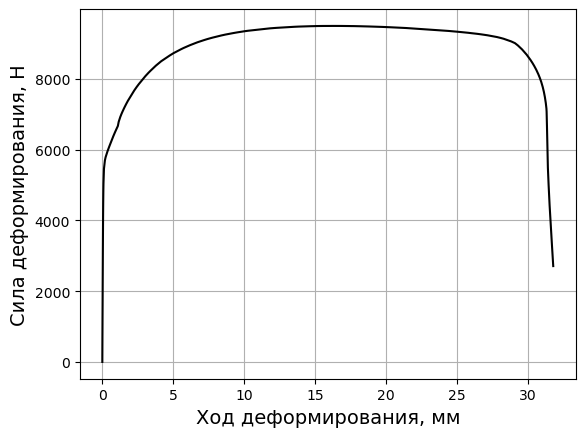

In [22]:
# визуализируем данные с помощью импортированной ранее библиотеки matplotlib

# создаем "базу" для график
plt.plot (stroke, load, '-', color = 'black')
# Добавляем названия осей
plt.xlabel ('Ход деформирования, мм', fontsize = 14)
plt.ylabel ('Сила деформирования, Н', fontsize = 14)
# добавляем для красоты сетку
plt.grid()

Пересчет графика сила деформирования по ходу деформирвоания в график инженерное напряжение - инженерная деформация происходит по следующим формулам:
$$
\sigma_{eng} = \frac{F}{A_0} \text {,}  \quad \epsilon_{eng} = \frac{\Delta L}{L_0}\times 100\%
$$
где:
$$
\begin{flalign}
\sigma_{eng} \text{ - инженерное напряжение течения, МПа} &&
\end{flalign}
$$
$$
\begin{flalign}
\epsilon_{eng} \text{ - инженерная деформация, \%} &&
\end{flalign}
$$



$$
\begin{flalign}
F \text{ - сила деформирования, Н} &&
\end{flalign}
$$

$$
\begin{flalign}
A_0 \text{ - площадь сечения образца,} \text{ мм}^2 &&
\end{flalign}
$$

$$
\begin{flalign}
\Delta L \text{ - ход деформирвоания, мм} &&
\end{flalign}
$$

$$
\begin{flalign}
L_0 \text{ - начальная длина образца, мм} &&
\end{flalign}
$$